In [47]:
#Run1 is considering JW Hamiltonain and 0-to-all connecting ansatz

import numpy as np
from qiskit_nature.second_q.operators import FermionicOp
from qiskit_nature.second_q.mappers import JordanWignerMapper

# Create list of terms from your matrix
terms = {}
n_modes = 8

# Your Hamiltonian matrix entries:
data = [
(0, 0, -0.1830),
(0, 1, -1.3268),
(0, 2, 0.1318),
(0, 3, -2.5310),
(0, 4, 1.5117),
(0, 5, 0.6417),
(0, 6, -1.3751),
(0, 7, 0.9695),
(1, 0, -1.3268),
(1, 1, -3.4800),
(1, 2, 0.7178),
(1, 3, -1.3268),
(1, 4, -1.2432),
(1, 5, -1.2432),
(1, 6, 0.7178),
(1, 7, -1.1194),
(2, 0, 0.1318),
(2, 1, 0.7178),
(2, 2, 0.8693),
(2, 3, -1.3751),
(2, 4, 0.1364),
(2, 5, 0.9461),
(2, 6, -2.0062),
(2, 7, -0.4243),
(3, 0, -2.5310),
(3, 1, -1.3268),
(3, 2, -1.3751),
(3, 3, -0.1830),
(3, 4, 0.6417),
(3, 5, 1.5117),
(3, 6, 0.1318),
(3, 7, 0.9695),
(4, 0, 1.5117),
(4, 1, -1.2432),
(4, 2, 0.1364),
(4, 3, 0.6417),
(4, 4, 0.7118),
(4, 5, -3.0987),
(4, 6, 0.9461),
(4, 7, 0.7348),
(5, 0, 0.6417),
(5, 1, -1.2432),
(5, 2, 0.9461),
(5, 3, 1.5117),
(5, 4, -3.0987),
(5, 5, 0.7118),
(5, 6, 0.1364),
(5, 7, 0.7348),
(6, 0, -1.3751),
(6, 1, 0.7178),
(6, 2, -2.0062),
(6, 3, 0.1318),
(6, 4, 0.9461),
(6, 5, 0.1364),
(6, 6, 0.8693),
(6, 7, -0.4243),
(7, 0, 0.9695),
(7, 1, -1.1194),
(7, 2, -0.4243),
(7, 3, 0.9695),
(7, 4, 0.7348),
(7, 5, 0.7348),
(7, 6, -0.4243),
(7, 7, 0.5480),

]

from qiskit.quantum_info import SparsePauliOp

num_qubits = 8

# Merge symmetric terms
pair_terms = {}
for i, j, x in data:
    key = tuple(sorted((i, j)))
    pair_terms[key] = pair_terms.get(key, 0) + x

paulis = []
coeffs = []

identity_coeff = 0.0  # To collect total weight of I terms

for (i, j), x in pair_terms.items():
    if i == j:
        # On-site term: (x / 2)(I - Z_i)
        identity_coeff += x / 2  # Collect I term

        z_term = ['I'] * num_qubits
        z_term[i] = 'Z'
        paulis.append(''.join(z_term)[::-1])
        coeffs.append(-x / 2)
    else:
        # Ensure i < j for consistency
        if i > j:
            i, j = j, i

        # Off-diagonal term: (x / 2)(X_i Z..Z X_j + Y_i Z..Z Y_j)
        # Each term gets x / 4 due to symmetrization
        z_string = ['I'] * num_qubits
        for k in range(i + 1, j):
            z_string[k] = 'I'

        for op in ['X', 'Y']:
            jw_term = z_string.copy()
            jw_term[i] = op
            jw_term[j] = op
            paulis.append(''.join(jw_term)[::-1])
            coeffs.append(x / 4)

# After the loop, add the combined identity term once (if non-zero)
if abs(identity_coeff) > 1e-12:  # Avoid tiny noise
    paulis.append('I' * num_qubits)
    coeffs.append(identity_coeff)

# Build SparsePauliOp
H_JW = SparsePauliOp.from_list(list(zip(paulis, coeffs)))

# Print Hamiltonian
print(H_JW)
print('')
print('Number of Pauli terms =', len(H_JW))


SparsePauliOp(['IIIIIIIZ', 'IIIIIIXX', 'IIIIIIYY', 'IIIIIXIX', 'IIIIIYIY', 'IIIIXIIX', 'IIIIYIIY', 'IIIXIIIX', 'IIIYIIIY', 'IIXIIIIX', 'IIYIIIIY', 'IXIIIIIX', 'IYIIIIIY', 'XIIIIIIX', 'YIIIIIIY', 'IIIIIIZI', 'IIIIIXXI', 'IIIIIYYI', 'IIIIXIXI', 'IIIIYIYI', 'IIIXIIXI', 'IIIYIIYI', 'IIXIIIXI', 'IIYIIIYI', 'IXIIIIXI', 'IYIIIIYI', 'XIIIIIXI', 'YIIIIIYI', 'IIIIIZII', 'IIIIXXII', 'IIIIYYII', 'IIIXIXII', 'IIIYIYII', 'IIXIIXII', 'IIYIIYII', 'IXIIIXII', 'IYIIIYII', 'XIIIIXII', 'YIIIIYII', 'IIIIZIII', 'IIIXXIII', 'IIIYYIII', 'IIXIXIII', 'IIYIYIII', 'IXIIXIII', 'IYIIYIII', 'XIIIXIII', 'YIIIYIII', 'IIIZIIII', 'IIXXIIII', 'IIYYIIII', 'IXIXIIII', 'IYIYIIII', 'XIIXIIII', 'YIIYIIII', 'IIZIIIII', 'IXXIIIII', 'IYYIIIII', 'XIXIIIII', 'YIYIIIII', 'IZIIIIII', 'XXIIIIII', 'YYIIIIII', 'ZIIIIIII', 'IIIIIIII'],
              coeffs=[ 0.0915 +0.j, -0.6634 +0.j, -0.6634 +0.j,  0.0659 +0.j,  0.0659 +0.j,
 -1.2655 +0.j, -1.2655 +0.j,  0.75585+0.j,  0.75585+0.j,  0.32085+0.j,
  0.32085+0.j, -0.68755+0.j, -0.68755+0.j

Number of qubits: 8

--- Running VQE with COBYLA ---


/tmp/ipykernel_35493/1025376264.py:73: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Minimum Eigenvalue: -5.4370379959441735
VQE with COBYLA: -5.43704
Delta from reference: 0.00000

--- Running VQE with SLSQP ---


/tmp/ipykernel_35493/1025376264.py:73: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Minimum Eigenvalue: -5.437038157169022
VQE with SLSQP: -5.43704
Delta from reference: 0.00000

--- Running VQE with SPSA ---


/tmp/ipykernel_35493/1025376264.py:73: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  estimator = Estimator()


Minimum Eigenvalue: -5.0116633883285395
VQE with SPSA: -5.01166
Delta from reference: 0.42538


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


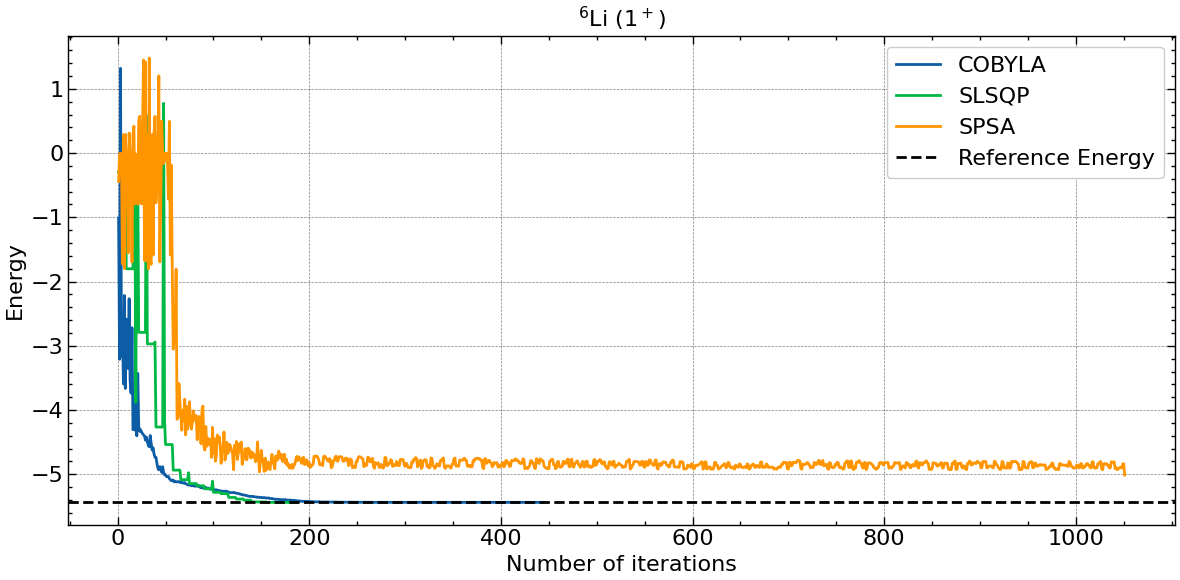

In [49]:
import numpy as np
import matplotlib as plt
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import EvolvedOperatorAnsatz
from qiskit.primitives import Estimator
from qiskit_algorithms.minimum_eigensolvers import AdaptVQE, VQE
from qiskit_algorithms.optimizers import SLSQP, COBYLA, GradientDescent, SPSA
from qiskit import QuantumCircuit
import scienceplots
plt.style.use(['science','notebook','grid'])


print(f"Number of qubits: {H_JW.num_qubits}")

from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector

# Create parameter vector
params = ParameterVector("theta", 7)

# Create quantum circuit
qc = QuantumCircuit(8)

# Initial gates
qc.x(0)
qc.h(0)
qc.cx(0, 1)
qc.ry(-params[0], 0)
qc.ry(-params[0], 1)
qc.cx(0, 1)
qc.h(0)

# Loop over qubits 2, 8
for i in range(2, 8):
    qc.h(i - 1)
    qc.cx(i - 1, i)
    qc.ry(-params[i - 1], i - 1)
    qc.ry(-params[i - 1], i)
    qc.cx(i - 1, i)
    qc.h(i - 1)

import pylab

# Shared setup
iterations = 1000
ref_value = -5.43703843
optimizers = {
    "COBYLA": COBYLA(maxiter=iterations),
    "SLSQP": SLSQP(maxiter=iterations),
    # "GradientDescent": GradientDescent(maxiter=iterations),
    "SPSA": SPSA(maxiter=iterations/2),
}

# Store data for plotting
all_counts = {}
all_values = {}
results = {}

for name, optimizer in optimizers.items():
    counts = []
    values = []

    log_filename = f"Run3_intermediate_{name.lower()}.txt"
    with open(log_filename, "w") as log_file:

        def store_intermediate_result(eval_count, parameters, mean, std):
            counts.append(eval_count)
            values.append(mean)
            # Log the iteration data to a file
            log_file.write(f"Eval count: {eval_count}, Parameters: {parameters}, Energy: {mean}\n")

        print(f"\n--- Running VQE with {name} ---")
        estimator = Estimator()
        vqe = VQE(estimator, qc, optimizer, callback=store_intermediate_result)
        result = vqe.compute_minimum_eigenvalue(H_JW)
        results[name] = result

        # Save values for plotting
        all_counts[name] = counts
        all_values[name] = values

        # Final summary results
        delta = result.eigenvalue.real - ref_value
        print(f"Minimum Eigenvalue: {result.eigenvalue}")
        print(f"VQE with {name}: {result.eigenvalue.real:.5f}")
        print(f"Delta from reference: {delta:.5f}")

        with open(f"result_{name.lower()}.txt", "w") as f:
            f.write(f"VQE Result using {name}\n")
            f.write(f"Minimum Eigenvalue: {result.eigenvalue.real:.10f}\n")
            f.write(f"Delta from reference: {delta:.10f}\n")

# --- Plot all curves ---
pylab.rcParams["figure.figsize"] = (12, 6)
for name in optimizers:
    pylab.plot(all_counts[name], all_values[name], label=name)
pylab.axhline(y=ref_value, color='k', linestyle='--', label='Reference Energy')
pylab.xlabel("Number of iterations")
pylab.ylabel("Energy")
pylab.title(r"$^6$Li (1$^+$)")
pylab.legend()
pylab.tight_layout()
pylab.savefig("6Li_vqe_optimizers_run3.eps", format="eps")
pylab.savefig("6Li_vqe_optimizers_run3.png", format="png")
pylab.show()
